<a href="https://colab.research.google.com/github/bhargavi18301/Tic-Tac-Toe/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
# Check current location, '/content' is the Colab virtual machine
os.getcwd()
# Enable the Kaggle environment, use the path to the directory your Kaggle API JSON is stored in
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!pip install kaggle

In [ ]:
os.chdir('/content/drive/MyDrive/kaggle')
!kaggle datasets download -d jangedoo/utkface-new
# Check contents of directory, you should see the .zip file for the competition in your Drive
os.listdir()

utkface-new.zip: Skipping, found more recently modified local copy (use --force to force download)


['kaggle.json',
 'crop_part1 (1)',
 'utkface_aligned_cropped (1)',
 'utkface-new.zip',
 'UTKFace',
 'crop_part1',
 'utkface_aligned_cropped']

In [ ]:
zip_path = '/content/drive/MyDrive/kaggle/utkface-new.zip'
# Check current directory (be sure you're in the directory where Colab operates: '/content')
os.getcwd()
# Copy the .zip file into the present directory
!cp '{zip_path}' .
# Unzip quietly 
!unzip -q 'utkface-new.zip'
# View the unzipped contents in the virtual machine
os.listdir()

cp: '/content/drive/MyDrive/kaggle/utkface-new.zip' and './utkface-new.zip' are the same file
replace UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace UTKFace/100_0_0_20170112215240346.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

['kaggle.json',
 'crop_part1 (1)',
 'utkface_aligned_cropped (1)',
 'utkface-new.zip',
 'UTKFace',
 'crop_part1',
 'utkface_aligned_cropped']

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [ ]:
BASE_DIR = '/content/drive/MyDrive/kaggle/UTKFace/'

In [ ]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/drive/MyDrive/kaggle/UTKFace/75_0_0_2...,75,0
1,/content/drive/MyDrive/kaggle/UTKFace/82_1_0_2...,82,1
2,/content/drive/MyDrive/kaggle/UTKFace/75_0_0_2...,75,0
3,/content/drive/MyDrive/kaggle/UTKFace/7_0_0_20...,7,0
4,/content/drive/MyDrive/kaggle/UTKFace/81_1_0_2...,81,1


In [ ]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

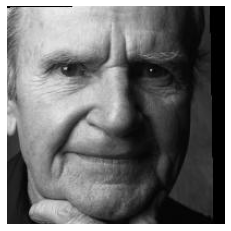

In [ ]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

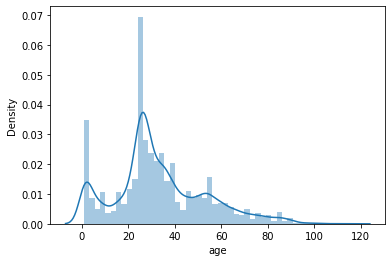

In [ ]:
sns.distplot(df['age'])

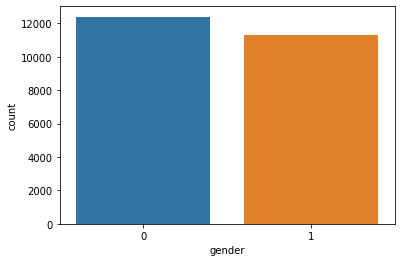

In [ ]:
sns.countplot(df['gender'])

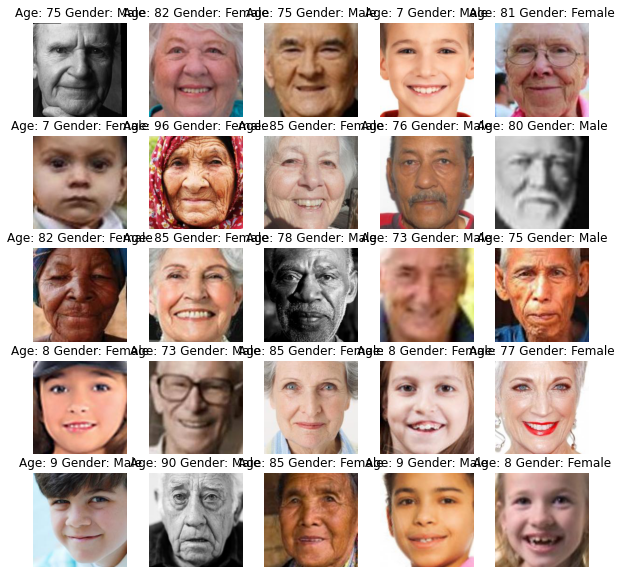

In [ ]:
# to display grid of images
plt.figure(figsize=(10, 10))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

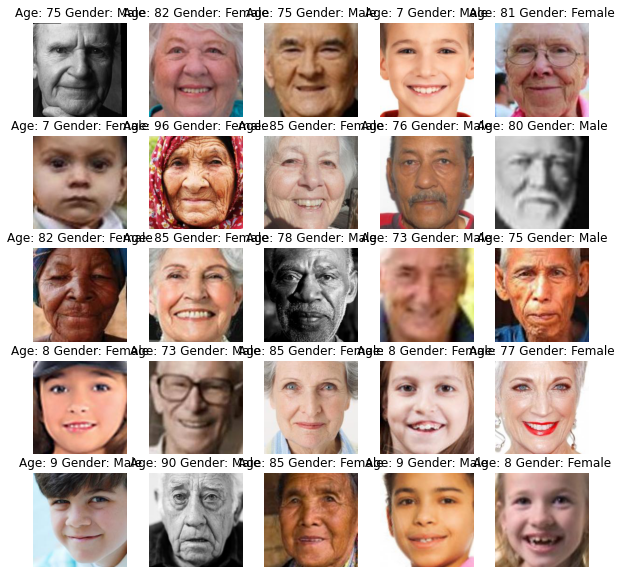

In [ ]:
# to display grid of images
plt.figure(figsize=(10, 10))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((30, 30), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    #features = features.reshape(len(features), 30, 30, 1)
    return features

In [ ]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
X.shape

NameError: ignored

In [ ]:
# normalize the images
X = X/255.0

In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [ ]:
input_shape = (30, 30, 1)

In [ ]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
#conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
#maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_3)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model

In [ ]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 29s 46ms/step - loss: 16.2682 - gender_out_loss: 0.6934 - age_out_loss: 15.5749 - gender_out_accuracy: 0.5350 - age_out_accuracy: 0.0000e+00 - val_loss: 21.0451 - val_gender_out_loss: 0.7012 - val_age_out_loss: 20.3438 - val_gender_out_accuracy: 0.4507 - val_age_out_accuracy: 0.2368
Epoch 2/30
593/593 [==============================] - 28s 46ms/step - loss: 15.4689 - gender_out_loss: 0.6900 - age_out_loss: 14.7789 - gender_out_accuracy: 0.5407 - age_out_accuracy: 0.0000e+00 - val_loss: 23.9334 - val_gender_out_loss: 0.7020 - val_age_out_loss: 23.2314 - val_gender_out_accuracy: 0.4507 - val_age_out_accuracy: 0.2368
Epoch 3/30
593/593 [==============================] - 27s 45ms/step - loss: 15.4258 - gender_out_loss: 0.6900 - age_out_loss: 14.7358 - gender_out_accuracy: 0.5407 - age_out_accuracy: 0.0000e+00 - val_loss: 20.1313 - val_gender_out_loss: 0.6992 - val_age_out_loss: 19.4320 - val_gender_out_accuracy: 0.4507 - val_age_out_acc

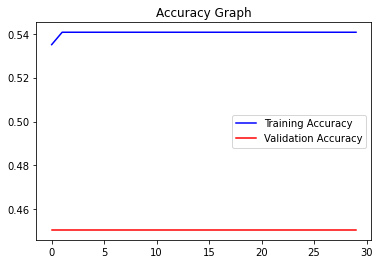

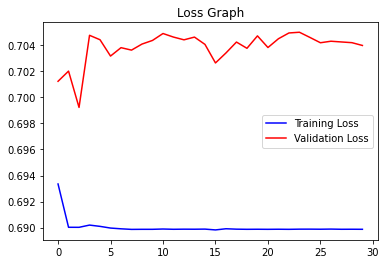

In [ ]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

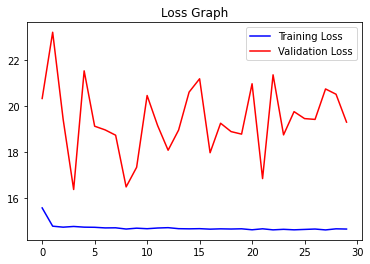

In [ ]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Male Original Age: 90
Predicted Gender: Male Predicted Age: 34


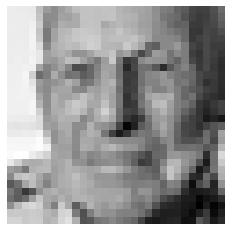

In [ ]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 30, 30, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(30, 30), cmap='gray');

Original Gender: Male Original Age: 58
Predicted Gender: Male Predicted Age: 34


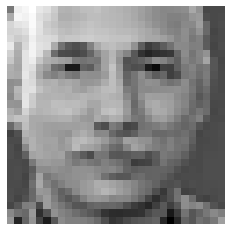

In [ ]:
image_index = 3000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 30, 30, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(30, 30), cmap='gray');

Original Gender: Male Original Age: 34
Predicted Gender: Male Predicted Age: 34


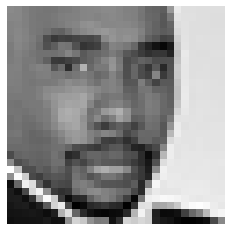

In [ ]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 30, 30, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(30, 30), cmap='gray');